<a href="https://colab.research.google.com/github/DSGP-Group-1-EAPS/SL-Apparel-Dataset/blob/Ranidu-Gurusinghe/ARIMA_and_Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [ ]:
from google.colab import drive
import pandas as pd


##Loading Data

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Load the preprocessed data from Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Dataset/preprocessed_data_new.xlsx'
data = pd.read_excel(file_path)

# Display the loaded data
print(data.head())

Mounted at /content/drive
        Date    Shift   Code          Department Absenteeism Type    Status  \
0 2021-12-01  Shift A  AA369  Team - MAT 4A - BD         Informed  Notified   
1 2021-12-01  Shift A  AA362  Team - MAT 4A - BD         Informed  Notified   
2 2021-12-01  Shift A  AA359  Team - MAT 4A - BD         Informed  Notified   
3 2021-12-01  Shift A  AA541  Team - MAT 4A - BD         Informed  Notified   
4 2021-12-01  Shift A  AA398  Team - MAT 3A - BD         Informed  Notified   

   Leave Type Absent/Present     Reason Joined Date  ...  LeaveMonth  \
0           1            MAT  Maternity  2015-09-11  ...          12   
1           1            MAT  Maternity  2018-11-14  ...          12   
2           1            MAT  Maternity  2019-10-09  ...          12   
3           1            MAT  Maternity  2020-10-02  ...          12   
4           1            MAT  Maternity  2008-02-29  ...          12   

   Encoded Reason  Encoded Status  Encoded Absenteeism Type  Encod

In [ ]:
unique_employee_codes = data['Code'].unique()
print(unique_employee_codes)
print(unique_employee_codes.shape)

['AA369' 'AA362' 'AA359' ... 'AA2313' 'AA3449' 'AA4244']
(3640,)


In [ ]:
leave_days_AA369 = data[data['Code'] == 'AA359'][['LeaveYear','LeaveMonth', 'Date']]
print(leave_days_AA369)


       LeaveYear  LeaveMonth       Date
2           2021          12 2021-12-01
403         2021          12 2021-12-06
933         2021          12 2021-12-13
1700        2021          12 2021-12-24
1814        2021          12 2021-12-26
1820        2021          12 2021-12-26
3020        2021          12 2021-12-30
3192        2022           1 2022-01-03
3723        2022           1 2022-01-10
4206        2022           1 2022-01-18
12343       2022           5 2022-05-05
12344       2022           5 2022-05-05
13962       2022           5 2022-05-19
13963       2022           5 2022-05-19
14335       2022           5 2022-05-23
14717       2022           5 2022-05-26
15063       2022           5 2022-05-30
15631       2022           6 2022-06-06
15632       2022           6 2022-06-06
16946       2022           6 2022-06-18
18059       2022           6 2022-06-29
18232       2022           7 2022-07-04
18644       2022           7 2022-07-11
18856       2022           7 2022-07-14


In [ ]:
leave_days_by_month = data.groupby(['LeaveYear', 'LeaveMonth']).size().reset_index(name='TotalLeaveDays')
print(leave_days_by_month)
ts_data = leave_days_by_month['TotalLeaveDays']

    LeaveYear  LeaveMonth  TotalLeaveDays
0        2021          12            3184
1        2022           1            2181
2        2022           2            2353
3        2022           3            2471
4        2022           4            1770
5        2022           5            3351
6        2022           6            2834
7        2022           7            1580
8        2022           8            1724
9        2022           9            1575
10       2022          10            1905
11       2022          11            1664
12       2022          12            1155
13       2023           1            1104
14       2023           2             412
15       2023           3            1264
16       2023           4             469
17       2023           5            1758
18       2023           6            1260
19       2023           7            1098
20       2023           8            1082
21       2023           9            1030
22       2023          10         

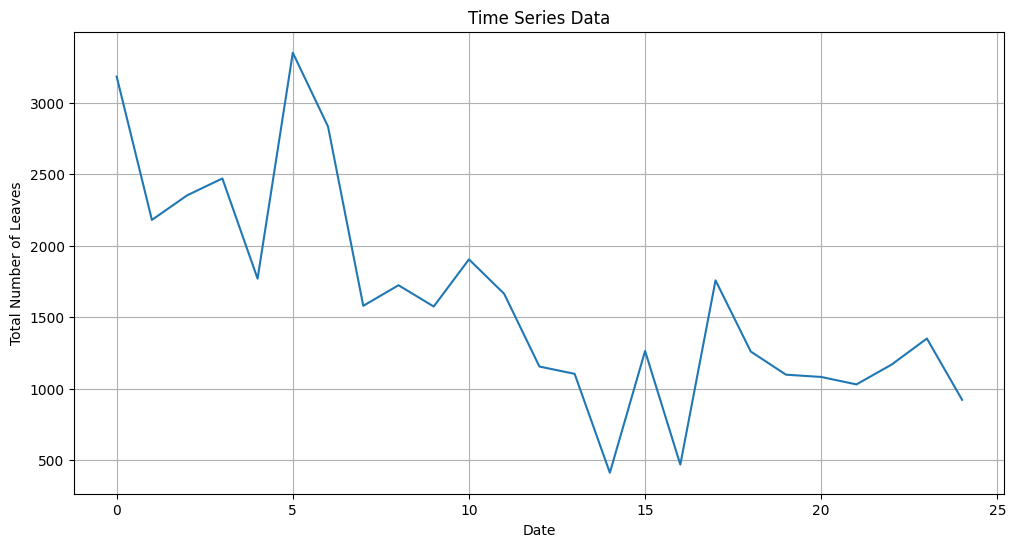

ADF Statistic: -0.9336382039217688
p-value: 0.7766931768801943
Critical Values:
   1%: -3.8092091249999998
   5%: -3.0216450000000004
   10%: -2.6507125


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(ts_data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Total Number of Leaves')
plt.grid(True)
plt.show()

# Perform statistical tests for stationarity
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    # Perform Augmented Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

adf_test(ts_data)



time series data is non-stationary, indicating the presence of trends or seasonality

##Developing ARIMA Model

(22,)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


22    1231.497343
23    1248.013756
24     977.922040
Name: predicted_mean, dtype: float64
Mean Squared Error: 5879.786326055356
Root Mean Squared Error (RMSE): 76.67976477569135


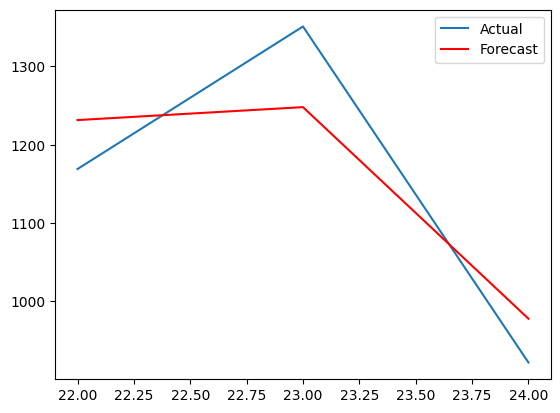

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 3: Split Data
train_size = int(len(leave_days_by_month) * 0.9)
train_data, test_data = leave_days_by_month['TotalLeaveDays'][:train_size], ts_data[train_size:]
print(train_data.shape)
# Step 4: Build and Train ARIMA Model
order = (6, 2, 1)  # Example ARIMA parameters (p, d, q)
model = ARIMA(train_data, order=order)
trained_model = model.fit()

# Step 5: Validate Model
forecast = trained_model.forecast(steps=3)
print(forecast)
# Step 6: Evaluate Model
mse = mean_squared_error(test_data, forecast)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualize Results
plt.plot(test_data, label='Actual')
plt.plot(forecast, color='red', label='Forecast')
plt.legend()
plt.show()


##Developing Random Forest Classifier

In [84]:

monthly_totals = {}

for index, row in leave_days_by_month.iterrows():
    year = row['LeaveYear']
    month = row['LeaveMonth']
    total_leave_days = row['TotalLeaveDays']
    monthly_totals[(year, month)] = total_leave_days




forecast={
    (2023, 10): 1231,
    (2023, 11): 1248,
    (2023, 12): 977
}

# Create a new column 'MonthlyTotal' by mapping the (year, month) tuple to its corresponding total leave count
data['MonthlyTotal'] = data.apply(lambda row: monthly_totals.get((row['LeaveYear'], row['LeaveMonth']), 0), axis=1)

# Display the updated DataFrame
print(data)


            Date    Shift    Code                    Department  \
0     2021-12-01  Shift A   AA369            Team - MAT 4A - BD   
1     2021-12-01  Shift A   AA362            Team - MAT 4A - BD   
2     2021-12-01  Shift A   AA359            Team - MAT 4A - BD   
3     2021-12-01  Shift A   AA541            Team - MAT 4A - BD   
4     2021-12-01  Shift A   AA398            Team - MAT 3A - BD   
...          ...      ...     ...                           ...   
40661 2023-12-22  Shift A  AA2212  Sewing Team - 145A - II - BD   
40662 2023-12-22  Shift A   AA723   Sewing Team - 109A - I - BD   
40663 2023-12-22  Shift A  AA1280   Sewing Team - 152A - I - BD   
40664 2023-12-22  Shift A  AA1964   Sewing Team - 135A - I - BD   
40665 2023-12-22  Shift A    AA12   Sewing Team - 153A - I - BD   

      Absenteeism Type    Status  Leave Type Absent/Present           Reason  \
0             Informed  Notified           1            MAT        Maternity   
1             Informed  Notified   

In [71]:
def onehot_encode(df, column, prefix):
    df = df.copy()

    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)

    return df

In [109]:
from sklearn.model_selection import train_test_split
def preprocess_inputs(df):
    df = df.copy()
    rf_selected_features = ['Date','DaysWorked', 'DayOfWeek', 'Encoded Code', 'LeaveMonth', 'Encoded Status',
                        'Encoded Absenteeism Type', 'Encoded Shift', 'LeaveYear', 'NumOfLeaveDays', 'MonthlyTotal',
                        'Reason_0', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Reason_5',
                        'Reason_6', 'Reason_7', 'Reason_8', 'Reason_9', 'Reason_10', 'Reason_11',
                        'Reason_12', 'Reason_13', 'Reason_14', 'Reason_15', 'Reason_16', 'Reason_17',
                        'Reason_18', 'TargetCategory']

    # One-hot encode the reason column
    df = onehot_encode(
        df,
        column='Encoded Reason',
        prefix='Reason'
    )

    df = df[rf_selected_features]

    # Filter the data for November 2023
    testing_data_november = df[(df['LeaveYear'] == 2023) & (df['LeaveMonth'] >= 11)]
    print("Nov", testing_data_november.shape)
    df = df[df['Date'] < '2023-11-01']
    testing_data_october = df[(df['LeaveYear'] == 2023) & (df['LeaveMonth'] >= 10)]
    print("Oct", testing_data_october.shape)
    df = df[df['Date'] < '2023-10-01']
    testing_data_september = df[(df['LeaveYear'] == 2023) & (df['LeaveMonth'] >= 9)]
    print("Sept", testing_data_september.shape)



    testing_data = df[df['Date'] > '2023-09-01']
    df = df[df['Date'] < '2023-10-01']
    df = df.drop('Date', axis=1)
    testing_data = testing_data.drop('Date', axis=1)
    testing_data_october_copy = testing_data_october.copy()
    testing_data_october_copy = testing_data_october_copy.drop('Date', axis=1)



    # Split df into X and y
    Y_train = df['TargetCategory'].copy()
    X_train = df.drop('TargetCategory', axis=1)
    X_test = testing_data_october_copy.drop('TargetCategory', axis=1)
    Y_test = testing_data_october_copy['TargetCategory'].copy()
    print(X_test['LeaveMonth'])
    X_test['MonthlyTotal'] = data.apply(lambda row: forecast.get((row['LeaveYear'], row['LeaveMonth']+1), 0), axis=1)

    return testing_data_september, testing_data_october, testing_data_november, X_train, X_test, Y_train, Y_test

In [110]:
# Split the remaining data into training and testing sets
testing_data_september, testing_data_october, testing_data_november, X_train, X_test, y_train, y_test = preprocess_inputs(data)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_test)
testing_data_september.to_excel('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Dataset/testing_data_september.xlsx', index=False)
testing_data_october.to_excel('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Dataset/testing_data_october.xlsx', index=False)
testing_data_november.to_excel('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Dataset/testing_data_november.xlsx', index=False)

Nov (2273, 31)
Oct (1169, 31)
Sept (1030, 31)
37190    10
37191    10
37192    10
37193    10
37194    10
         ..
39175    10
39176    10
39177    10
39178    10
39179    10
Name: LeaveMonth, Length: 1169, dtype: int64
(37224, 29)
(37224,)
(1169, 29)
(1169,)
       DaysWorked  DayOfWeek  Encoded Code  LeaveMonth  Encoded Status  \
37190       10146          1           717          10               1   
37191        7831          1          3420          10               1   
37192       10016          1          1585          10               1   
37193        7780          1          3155          10               1   
37194        9947          1          1374          10               1   
...           ...        ...           ...         ...             ...   
39175        2718          5          1506          10               1   
39176         968          5           275          10               1   
39177         738          5          2989          10               1 

In [111]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Instantiate SMOTE
smote = SMOTE(random_state=123)

# Apply SMOTE to your training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(X_train_resampled.shape)

(49570, 29)


In [112]:
from sklearn. ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, max_depth=40,random_state=123)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=40, n_estimators=500, random_state=123)

In [113]:
from sklearn.metrics import accuracy_score


predictions_rf = rf_model.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_rf})
accuracy = accuracy_score(y_test, predictions_rf)


print("Actual values and predictions:")
print(results_df)
print("\n\nAccuracy of Predicted Classes:", accuracy)


Actual values and predictions:
      Actual Predicted
37190      A         A
37191      A         A
37192      A         A
37193      A         A
37194      A         A
...      ...       ...
39175      A         A
39176      A         A
39177      A         A
39178      B         A
39179      A         A

[1169 rows x 2 columns]


Accuracy of Predicted Classes: 0.8297690333618477


In [114]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, predictions_rf)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           A       0.84      0.95      0.89       849
           B       0.80      0.50      0.62       320

    accuracy                           0.83      1169
   macro avg       0.82      0.73      0.75      1169
weighted avg       0.83      0.83      0.82      1169



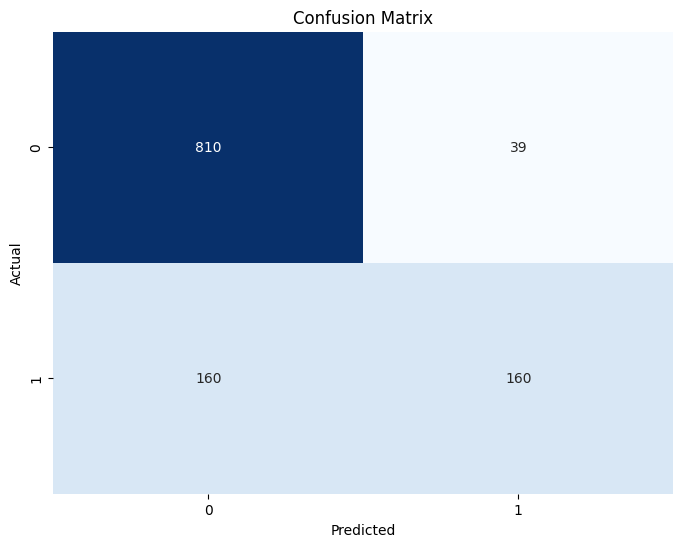

In [115]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, predictions_rf)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [116]:
# Get the predicted probabilities for each class
predicted_probabilities = rf_model.predict_proba(X_test)

# Get the index of class B
class_b_index = list(rf_model.classes_).index('B')

# Extract the probabilities for class B
class_b_probabilities = predicted_probabilities[:, class_b_index]

# Assuming the confidence level is the probability of class B
confidence_level_b = class_b_probabilities

# Iterate over each prediction in class B
for i, (actual, predicted, probability) in enumerate(zip(y_test, predictions_rf, confidence_level_b)):
    if predicted == 'B':
        print(f"Actual: {actual}, Predicted: {predicted}, Probability: {probability}")


Actual: B, Predicted: B, Probability: 0.642
Actual: A, Predicted: B, Probability: 0.85
Actual: B, Predicted: B, Probability: 0.83
Actual: A, Predicted: B, Probability: 0.53
Actual: B, Predicted: B, Probability: 0.91
Actual: B, Predicted: B, Probability: 0.924
Actual: B, Predicted: B, Probability: 0.924
Actual: B, Predicted: B, Probability: 0.896
Actual: B, Predicted: B, Probability: 0.93
Actual: B, Predicted: B, Probability: 0.81
Actual: B, Predicted: B, Probability: 0.874
Actual: B, Predicted: B, Probability: 0.69
Actual: A, Predicted: B, Probability: 0.68
Actual: B, Predicted: B, Probability: 0.958
Actual: B, Predicted: B, Probability: 0.92
Actual: B, Predicted: B, Probability: 0.94
Actual: B, Predicted: B, Probability: 0.586
Actual: A, Predicted: B, Probability: 0.546
Actual: A, Predicted: B, Probability: 0.716
Actual: B, Predicted: B, Probability: 0.934
Actual: B, Predicted: B, Probability: 0.688
Actual: B, Predicted: B, Probability: 0.772
Actual: B, Predicted: B, Probability: 0.85

In [117]:
# Filter predictions with probability > 0.9
high_confidence_predictions = [(actual, predicted, probability) for actual, predicted, probability in zip(y_test, predictions_rf, confidence_level_b) if probability > 0.9]

# Display filtered predictions
for actual, predicted, probability in high_confidence_predictions:
    print(f"Actual: {actual}, Predicted: {predicted}, Probability: {probability}")

Actual: B, Predicted: B, Probability: 0.91
Actual: B, Predicted: B, Probability: 0.924
Actual: B, Predicted: B, Probability: 0.924
Actual: B, Predicted: B, Probability: 0.93
Actual: B, Predicted: B, Probability: 0.958
Actual: B, Predicted: B, Probability: 0.92
Actual: B, Predicted: B, Probability: 0.94
Actual: B, Predicted: B, Probability: 0.934
Actual: B, Predicted: B, Probability: 0.906
Actual: B, Predicted: B, Probability: 0.962
Actual: B, Predicted: B, Probability: 0.916
Actual: B, Predicted: B, Probability: 0.954
Actual: B, Predicted: B, Probability: 0.96
Actual: B, Predicted: B, Probability: 0.958
Actual: B, Predicted: B, Probability: 0.94
Actual: B, Predicted: B, Probability: 0.98
Actual: B, Predicted: B, Probability: 0.974
Actual: B, Predicted: B, Probability: 0.938
Actual: B, Predicted: B, Probability: 0.924
Actual: B, Predicted: B, Probability: 0.92
Actual: B, Predicted: B, Probability: 0.954
Actual: B, Predicted: B, Probability: 0.944
Actual: B, Predicted: B, Probability: 0.

In [118]:
# Filter predictions with probability > 0.9 and predicted as category B
high_confidence_category_b = [X_test.iloc[i]['Encoded Code'] for i, (_, predicted, probability) in enumerate(zip(y_test, predictions_rf, confidence_level_b)) if predicted == 'B' and probability > 0.9]

# Display encoded codes of employees predicted to be in category B with >0.9 probability
print("Encoded codes of employees predicted to be in category B with > 0.9 probability:")
for encoded_code in high_confidence_category_b:
    print("AA"+str(encoded_code))


Encoded codes of employees predicted to be in category B with > 0.9 probability:
AA4102
AA1316
AA1666
AA1752
AA3308
AA3984
AA4098
AA4096
AA4036
AA4096
AA243
AA2306
AA2766
AA1072
AA320
AA4042
AA4036
AA3895
AA3308
AA3308
AA4096
AA2306
AA2031
AA2766
AA1072
AA4042
AA4036
AA4032
AA1442
AA1316
AA1666
AA1752
AA4098
